In [26]:
import pandas as pd
bbc_text_df = pd.read_csv('bbc-text.csv')
bbc_text_df.head()
#bbc_text_df.shape

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

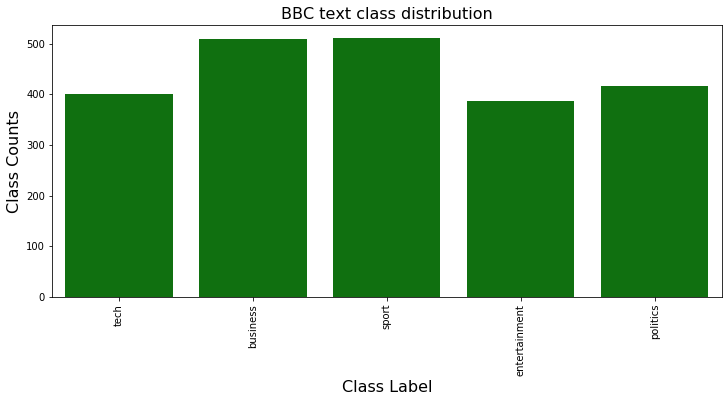

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(x=bbc_text_df.category, color='green')
plt.title('BBC text class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical')

In [6]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [7]:
bbc_text_df.iloc[2,1]

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

In [8]:
clean_text(bbc_text_df.iloc[2,1])

'tiger wari farrel gambl leicest rush make bid andi farrel great britain rugbi leagu captain decid switch code anybodi involv process wai awai go stage tiger boss john well told bbc radio leicest moment lot unknown andi farrel medic situat go big big gambl farrel persist knee problem oper knee week ago expect month leicest saracen believ head list rugbi union club interest sign farrel decid man game union well believ better plai back initi sure step leagu union involv centr said well think england prefer progress posit row us rugbi leagu skill forward juri cross divid club balanc struck cost gambl option bring readi replac'

In [9]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

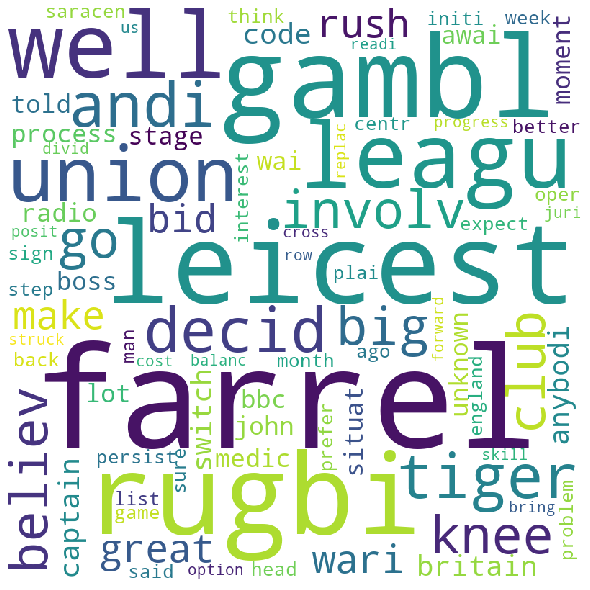

In [10]:
plot_word_cloud(clean_text(bbc_text_df.iloc[2,1]))

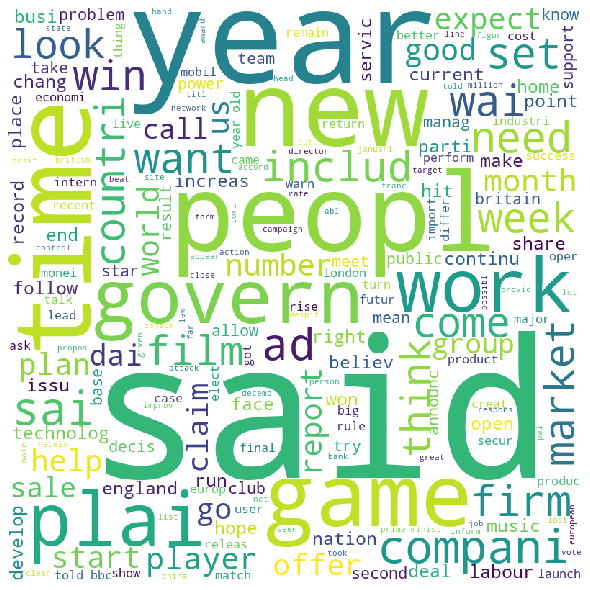

In [11]:
texts = ''
for index, item in bbc_text_df.iterrows():
    texts = texts + ' ' + clean_text(item['text'])
    
plot_word_cloud(texts)

In [12]:
def plot_word_cloud_for_category(bbc_text_df, category):
    text_df = bbc_text_df.loc[bbc_text_df['category'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['text'])
    print(category, " Category---------------------------- ")
    plot_word_cloud(texts)

sport  Category---------------------------- 


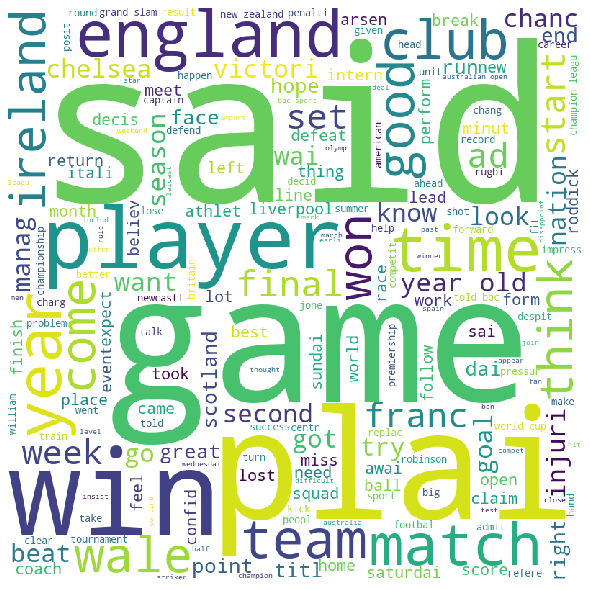

entertainment  Category---------------------------- 


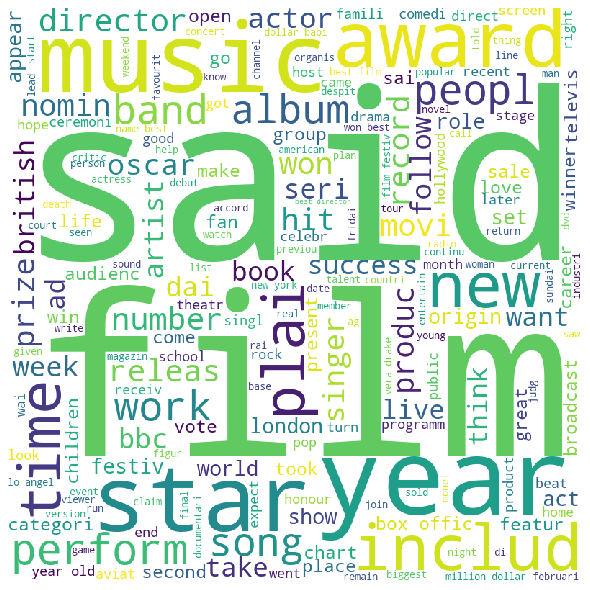

business  Category---------------------------- 


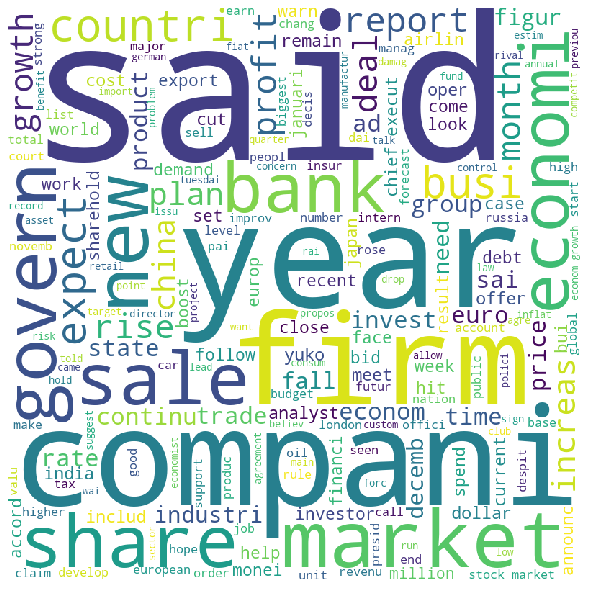

politics  Category---------------------------- 


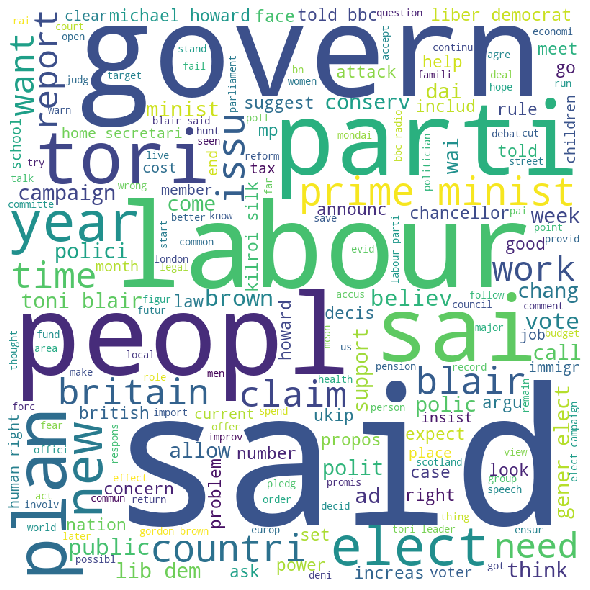

tech  Category---------------------------- 


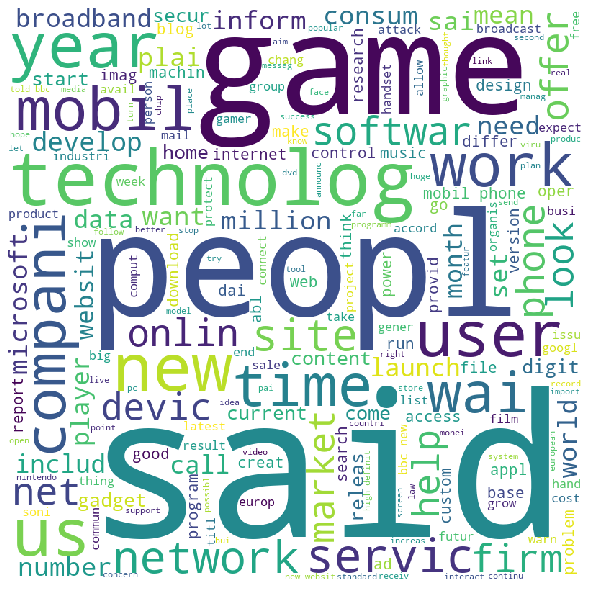

In [13]:
for cat in list(set(list(bbc_text_df["category"]))):
    plot_word_cloud_for_category(bbc_text_df,cat)

In [14]:
df_x = bbc_text_df['text']
df_y = bbc_text_df['category']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator

class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)

In [22]:
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(df_x).transform(df_x)

In [25]:
tfidf_vectors.shape

(2225, 18754)

In [139]:
print(tfidf_vectors)


  (0, 18656)	0.026751783070208267
  (0, 18461)	0.012282569403139645
  (0, 18330)	0.06321612895581909
  (0, 18304)	0.1583605258104538
  (0, 18174)	0.03191861694040893
  (0, 18106)	0.07347900571034054
  (0, 18077)	0.0820082845034905
  (0, 18027)	0.08634135472606572
  (0, 17846)	0.024976845920106364
  (0, 17835)	0.03920692490243918
  (0, 17819)	0.0237112847547106
  (0, 17635)	0.10369692742506256
  (0, 17586)	0.058415007300576784
  (0, 17171)	0.42378247529420265
  (0, 17022)	0.04909762905009908
  (0, 16860)	0.024467110895914575
  (0, 16826)	0.012395674298416093
  (0, 16801)	0.04354600077310887
  (0, 16800)	0.1061221922410514
  (0, 16759)	0.019836834312179287
  (0, 16756)	0.02454881452504954
  (0, 16637)	0.108042004704681
  (0, 16625)	0.3048220054117621
  (0, 16528)	0.02112249983533661
  (0, 16356)	0.030876741901122738
  :	:
  (2224, 8118)	0.5554941760150036
  (2224, 8007)	0.10226374007302491
  (2224, 7455)	0.11194511747688254
  (2224, 7426)	0.0589324755687766
  (2224, 7372)	0.0462288710188

In [141]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(list(bbc_text_df['category']))))

LabelEncoder()

In [142]:
list(le.classes_)

['business', 'entertainment', 'politics', 'sport', 'tech']

In [143]:
le.transform(list(set(list(bbc_text_df['category']))))

array([3, 0, 4, 1, 2])

In [144]:
bbc_text_df['category'] = le.transform(bbc_text_df['category'])

In [145]:
from sklearn.model_selection import train_test_split
#Split test and training data set
X_train, X_test, y_train, y_test = train_test_split(bbc_text_df['text'].values.astype('U'),bbc_text_df['category'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = bbc_text_df['category'].unique()

In [146]:
classes

array([4, 0, 3, 1, 2])

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier


In [176]:
#grid search result
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

/home/kiran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [149]:
import pickle
pickle.dump(classifier,open("news_classifier.pkl","wb"))
pickle.dump(vocab,open("vocab_news_classifier.pkl","wb"))

In [150]:
ls

bbc-text.csv                     text_classification.ipynb
sentiment_classifier.pkl         vocab_sentiment_classifier.pkl
star-wars-script-analysis.ipynb


In [195]:
scores = cross_val_score(classifier, example_counts, y_test, cv=5)

/home/kiran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [205]:
score = scores.mean()
print(round(score,3))

0.955


In [151]:
vec = open("sentiment_classifier.pkl", 'rb')
loaded_model = pickle.load(vec)
vcb = open("vocab_sentiment_classifier.pkl", 'rb')
loaded_vocab = pickle.load(vcb)

In [152]:
test = clean_text(bbc_text_df.iloc[2,1])

In [206]:
examples = [test]

In [154]:
from sklearn.feature_extraction.text import TfidfTransformer

In [155]:
count_vect = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2',vocabulary=loaded_vocab)
tfidf_transformer = TfidfTransformer()
x_count = count_vect.fit_transform(examples)
predicted = loaded_model.predict(x_count)
result_category = predicted[0]

In [199]:
newTest = """Chinese smartphone major Xiaomi on Thursday said its arm MI India will distribute 2,500 handsets worth Rs 2 crore to support online education of children who are worst affected by the COVID-19 pandemic in the country. "MI India distribution and retails came up with a fantastic idea. Together they will be contributing 2,500 smartphones to enable children most impacted by the pandemic to access quality education. In this endeavour we found the right partner Teach for India who is committed to the cause," its chief operating officer Muralikrishnan B said in an online video.

The company's managing director Manu Jain said MI India is committed to digital India initiative and has always supported education for all.

The company shared that the smartphones pledged are worth Rs 2 crore. Jain appealed to people to bring in notice of the company about anyone who needs a smartphone for online education and the company will try to help them.
"""

In [200]:
test= clean_text(newTest)
examples = [test]
count_vect = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2',vocabulary=loaded_vocab)
tfidf_transformer = TfidfTransformer()
x_count = count_vect.fit_transform(examples)
predicted = loaded_model.predict(x_count)
result_category = predicted[0]
result_category

0

In [202]:
le.inverse_transform([3])

array(['sport'], dtype='<U13')

In [203]:
final_pred = le.inverse_transform([result_category])
print(final_pred)

['business']


In [198]:
le.inverse_transform(classes)

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype='<U13')

In [208]:
#https://dzone.com/articles/storing-loading-and-using-machine-learning-models
#https://medium.com/towards-artificial-intelligence/text-classification-by-xgboost-others-a-case-study-using-bbc-news-articles-5d88e94a9f8

In [218]:
import logging
logging.basicConfig(filename="check.log",level=logging.DEBUG,
                    format=' %(message)s :: %(asctime)s | %(name)s | %(levelname)s|%(threadName)s')
logging.info("Running the classifier..")

2020-08-15 19:42:08,908 INFO Running the classifier..


## For API

In [ ]:
from flask import *
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import logging
from sklearn.feature_extraction.text import TfidfTransformer
from gensim import utils
import gensim.parsing.preprocessing as gsp
from sklearn import preprocessing
vec = open("news_classifier.pkl", 'rb')
loaded_model = pickle.load(vec)
vcb = open("vocab_news_classifier.pkl", 'rb')
loaded_vocab = pickle.load(vcb)
le = preprocessing.LabelEncoder()
labls = ['business', 'entertainment', 'politics', 'sport', 'tech']
le.fit(labls)

def CleanInput(input_text):
    filters = [
               gsp.strip_tags, 
               gsp.strip_punctuation,
               gsp.strip_multiple_whitespaces,
               gsp.strip_numeric,
               gsp.remove_stopwords, 
               gsp.strip_short, 
               gsp.stem_text
              ]

    def clean_text(s):
        s = s.lower()
        s = utils.to_unicode(s)
        for f in filters:
            s = f(s)
        return s
    res = clean_text(input_text)    
    return res
#mutliple inputs can be sent
def pred(text):
    examples = [text]
    count_vect = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2',vocabulary=loaded_vocab)
    tfidf_transformer = TfidfTransformer()
    x_count = count_vect.fit_transform(examples)
    predicted = loaded_model.predict(x_count)
    result_category = predicted[0]
    final_pred = le.inverse_transform([result_category])
    return final_pred

app = Flask(__name__)
logging.basicConfig(filename="classifier_logs.log",level=logging.DEBUG,
                    format=' %(message)s :: %(asctime)s | %(name)s | %(levelname)s|%(threadName)s')
logging.info("Running the classifier..")

@app.route('/auto_labeller',methods=['POST'])
def Label_It():
    input_text = request.get_json()['text']
    filtered_input = CleanInput(input_text)
    predictions = pred(filtered_input)
    #app.logging.info("Predicted Label for " + input_text + " Label is" + str(predictions))
    return jsonify({"Predicted Label":predictions})
if __name__ == "__main__":
    app.run(host='0.0.0.0',port="5002")

2020-08-15 21:23:40,249 INFO Running the classifier..


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


2020-08-15 21:23:46,204 ERROR Exception on /auto_labeller [POST]
Traceback (most recent call last):
  File "/home/kiran/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/kiran/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/kiran/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/kiran/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/kiran/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/kiran/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-250-634d408781df>", l